In [2]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
new_data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [4]:
new_data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [5]:
new_data.shape

(20800, 5)

In [6]:
new_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
news_data = new_data.fillna('')

In [10]:
news_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [12]:
news_data['NewContent'] = news_data['title']+ ' ' + news_data['author']

In [13]:
news_data['NewContent']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Consortiumne...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799              What Keeps the F-35 Alive David Swanson
Name: NewContent, Length: 20800, dtype: object

In [17]:
X = news_data.drop(columns = 'label', axis = 1)
Y = news_data['label']

In [30]:
port_stem = PorterStemmer()
import nltk


In [33]:
nltk.download('stopwords')
def stemming(argu):
  stemmed_content = re.sub('[^a-zA-Z]' , " " , argu)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
news_data['NewContent'] = news_data['NewContent'].apply(stemming)

In [38]:
print(news_data['NewContent'])
X = news_data['NewContent'].values
Y= news_data['label'].values

0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2                   truth might get fire consortiumnew com
3        civilian kill singl us airstrik identifi jessi...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci jero...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exercis balkan alex ...
20799                            keep f aliv david swanson
Name: NewContent, Length: 20800, dtype: object


In [41]:
vector = TfidfVectorizer()
transforming = vector.fit_transform(X)

In [42]:
X = transforming

In [44]:
print(X)

  (0, 8909)	0.3635963806326075
  (0, 3600)	0.3598939188262559
  (0, 15686)	0.28485063562728646
  (0, 2483)	0.3676519686797209
  (0, 7692)	0.24785219520671603
  (0, 8630)	0.29212514087043684
  (0, 2959)	0.2468450128533713
  (0, 13473)	0.2565896679337957
  (0, 4973)	0.233316966909351
  (0, 267)	0.27010124977708766
  (0, 3792)	0.2705332480845492
  (0, 7005)	0.21874169089359144
  (1, 3568)	0.26373768806048464
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 16799)	0.30071745655510157
  (1, 1497)	0.2939891562094648
  (1, 2813)	0.19094574062359204
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (2, 2943)	0.3179886800654691
  (2, 3103)	0.46097489583229645
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  :	:
  (20797, 1287)	0.3353805680413986
  (20797, 13122)	0.24825263521976057
  (20797, 12344)	0.27263457663336677
  (20797, 14967)	0.3115945315488075
  (20797, 12138)	0.24778257724396505
  (20797, 9518)	0.2954204

In [47]:
model = LogisticRegression()

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size= 0.2   )

In [58]:
model.fit(X_train , Y_train)


LogisticRegression()

In [49]:
training_pred = model.predict(X_train)
train_score= accuracy_score(training_pred , Y_train)

In [50]:
train_score

0.9867788461538461

In [51]:
test_pred = model.predict(X_test)
test_score = accuracy_score(test_pred , Y_test)

In [52]:
test_score

0.9786057692307693

In [54]:
import matplotlib.pyplot as plt

In [55]:
X_check = X_train[4]
check = model.predict(X_check)
check

array([1])

In [59]:
ycheck = Y_train[4]
ycheck

1

In [60]:
X_testcheck = X_test[4]
Tcheck = model.predict(X_testcheck)
Tcheck

array([0])

In [61]:
print(Y_test[4])

0


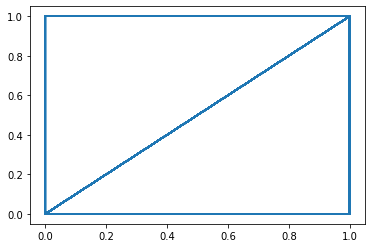

In [66]:
plt.plot(test_pred , Y_test)
plt.show()